In [2]:
import torchvision
import  torch
from  torch import  nn,optim,cuda,from_numpy
from torch.utils import  data
from  torchvision import  datasets,transforms
import  torch.nn.functional as F
import matplotlib.pyplot as plt
import  numpy as np
import  cv2


In [3]:
device ='cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [18]:
b_size = 64
train_dataset = datasets.FashionMNIST(root="FashionMNIST/raw/",
                               train = True,
                               transform = transforms.ToTensor(),
                               download = True)

test_dataset = datasets.FashionMNIST(root = "FashionMNIST/raw//",
                              train = False,
                              transform = transforms.ToTensor())

train_data = data.DataLoader(train_dataset, batch_size=b_size, shuffle=True)
test_data = data.DataLoader(test_dataset, batch_size=b_size, shuffle=False)

# Dataset malumotlarni tanitib olamiz
classes =('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

# Filterlash
"""
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.convlayer1 = nn.Sequential(
            nn.Conv2d(1, 32, 3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.convlayer2 = nn.Sequential(
            nn.Conv2d(32,64,3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(64*6*6,600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = self.convlayer1(x)
        x = self.convlayer2(x)
        x = x.view(-1,64*6*6)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return F.log_softmax(x,dim=1)
"""   
class FashionCNN(nn.Module):

    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(64*6*6, 600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x
    
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimize = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


def train(epoch):
    model.train()
    for b_i, data_ in enumerate(train_data):
        data_, label = data_[0].to(device), data_[1].to(device)
        optimize.zero_grad()
        predict = model(data_)
        fault = criterion(predict, label)
        fault.backward()
        optimize.step()

        if b_i % 10 == 0:
            print(f"Epoch - {epoch + 1} | Batch - {b_i} {b_i * len(data_)}/{len(train_data.dataset)} \
            | Loss: {fault.item()}")


def test():
    model.eval()
    Fault = 0
    Right = 0
    for img, label in test_data:
        img, label = img.to(device), label.to(device)
        predict = model(img)
        Fault += criterion(predict, label).item()
        result = predict.data.max(1, keepdim=True)[1]
        Right += result.eq(label.data.view_as(result)).cpu().sum()
    Fault /= (len(test_data.dataset))
    print(f"Aniqlik : {Right / len(test_data.dataset)}, Foizda {100.0 * Right / len(test_data.dataset)}%")


for epoch in range(10):
    train(epoch)
    test()


Epoch - 1 | Batch - 0 0/60000             | Loss: 2.3345704078674316
Epoch - 1 | Batch - 10 640/60000             | Loss: 0.9780783653259277
Epoch - 1 | Batch - 20 1280/60000             | Loss: 0.7256258130073547
Epoch - 1 | Batch - 30 1920/60000             | Loss: 0.8772724866867065
Epoch - 1 | Batch - 40 2560/60000             | Loss: 0.674946665763855
Epoch - 1 | Batch - 50 3200/60000             | Loss: 0.644557535648346
Epoch - 1 | Batch - 60 3840/60000             | Loss: 0.693207859992981
Epoch - 1 | Batch - 70 4480/60000             | Loss: 0.7393932938575745
Epoch - 1 | Batch - 80 5120/60000             | Loss: 0.44779089093208313
Epoch - 1 | Batch - 90 5760/60000             | Loss: 0.42321357131004333
Epoch - 1 | Batch - 100 6400/60000             | Loss: 0.5533121228218079
Epoch - 1 | Batch - 110 7040/60000             | Loss: 0.37308305501937866
Epoch - 1 | Batch - 120 7680/60000             | Loss: 0.2979929447174072
Epoch - 1 | Batch - 130 8320/60000             | Loss

Epoch - 2 | Batch - 150 9600/60000             | Loss: 0.2342856079339981
Epoch - 2 | Batch - 160 10240/60000             | Loss: 0.45452073216438293
Epoch - 2 | Batch - 170 10880/60000             | Loss: 0.31818071007728577
Epoch - 2 | Batch - 180 11520/60000             | Loss: 0.20328253507614136
Epoch - 2 | Batch - 190 12160/60000             | Loss: 0.20980015397071838
Epoch - 2 | Batch - 200 12800/60000             | Loss: 0.22783130407333374
Epoch - 2 | Batch - 210 13440/60000             | Loss: 0.2702189087867737
Epoch - 2 | Batch - 220 14080/60000             | Loss: 0.1991398185491562
Epoch - 2 | Batch - 230 14720/60000             | Loss: 0.31845563650131226
Epoch - 2 | Batch - 240 15360/60000             | Loss: 0.2500442564487457
Epoch - 2 | Batch - 250 16000/60000             | Loss: 0.28041714429855347
Epoch - 2 | Batch - 260 16640/60000             | Loss: 0.16697457432746887
Epoch - 2 | Batch - 270 17280/60000             | Loss: 0.20110228657722473
Epoch - 2 | Batch

Epoch - 3 | Batch - 300 19200/60000             | Loss: 0.14137113094329834
Epoch - 3 | Batch - 310 19840/60000             | Loss: 0.4575941264629364
Epoch - 3 | Batch - 320 20480/60000             | Loss: 0.17142128944396973
Epoch - 3 | Batch - 330 21120/60000             | Loss: 0.1455097198486328
Epoch - 3 | Batch - 340 21760/60000             | Loss: 0.2953767776489258
Epoch - 3 | Batch - 350 22400/60000             | Loss: 0.3204253911972046
Epoch - 3 | Batch - 360 23040/60000             | Loss: 0.21417543292045593
Epoch - 3 | Batch - 370 23680/60000             | Loss: 0.27384549379348755
Epoch - 3 | Batch - 380 24320/60000             | Loss: 0.44788479804992676
Epoch - 3 | Batch - 390 24960/60000             | Loss: 0.2573716342449188
Epoch - 3 | Batch - 400 25600/60000             | Loss: 0.2355978786945343
Epoch - 3 | Batch - 410 26240/60000             | Loss: 0.36183077096939087
Epoch - 3 | Batch - 420 26880/60000             | Loss: 0.24553197622299194
Epoch - 3 | Batch 

Epoch - 4 | Batch - 450 28800/60000             | Loss: 0.16399261355400085
Epoch - 4 | Batch - 460 29440/60000             | Loss: 0.1957048922777176
Epoch - 4 | Batch - 470 30080/60000             | Loss: 0.3267988860607147
Epoch - 4 | Batch - 480 30720/60000             | Loss: 0.23157814145088196
Epoch - 4 | Batch - 490 31360/60000             | Loss: 0.23564493656158447
Epoch - 4 | Batch - 500 32000/60000             | Loss: 0.10359091311693192
Epoch - 4 | Batch - 510 32640/60000             | Loss: 0.24875596165657043
Epoch - 4 | Batch - 520 33280/60000             | Loss: 0.25550758838653564
Epoch - 4 | Batch - 530 33920/60000             | Loss: 0.23642845451831818
Epoch - 4 | Batch - 540 34560/60000             | Loss: 0.37461552023887634
Epoch - 4 | Batch - 550 35200/60000             | Loss: 0.33738595247268677
Epoch - 4 | Batch - 560 35840/60000             | Loss: 0.23025986552238464
Epoch - 4 | Batch - 570 36480/60000             | Loss: 0.26308387517929077
Epoch - 4 | Ba

Epoch - 5 | Batch - 590 37760/60000             | Loss: 0.2661326825618744
Epoch - 5 | Batch - 600 38400/60000             | Loss: 0.2855360209941864
Epoch - 5 | Batch - 610 39040/60000             | Loss: 0.1633293777704239
Epoch - 5 | Batch - 620 39680/60000             | Loss: 0.19986577332019806
Epoch - 5 | Batch - 630 40320/60000             | Loss: 0.2318369448184967
Epoch - 5 | Batch - 640 40960/60000             | Loss: 0.3123100697994232
Epoch - 5 | Batch - 650 41600/60000             | Loss: 0.2944604158401489
Epoch - 5 | Batch - 660 42240/60000             | Loss: 0.1450515240430832
Epoch - 5 | Batch - 670 42880/60000             | Loss: 0.20186074078083038
Epoch - 5 | Batch - 680 43520/60000             | Loss: 0.22907797992229462
Epoch - 5 | Batch - 690 44160/60000             | Loss: 0.28481706976890564
Epoch - 5 | Batch - 700 44800/60000             | Loss: 0.31639641523361206
Epoch - 5 | Batch - 710 45440/60000             | Loss: 0.2948393225669861
Epoch - 5 | Batch - 

Epoch - 6 | Batch - 740 47360/60000             | Loss: 0.2619013786315918
Epoch - 6 | Batch - 750 48000/60000             | Loss: 0.2719426453113556
Epoch - 6 | Batch - 760 48640/60000             | Loss: 0.11076265573501587
Epoch - 6 | Batch - 770 49280/60000             | Loss: 0.18725217878818512
Epoch - 6 | Batch - 780 49920/60000             | Loss: 0.15933716297149658
Epoch - 6 | Batch - 790 50560/60000             | Loss: 0.23206330835819244
Epoch - 6 | Batch - 800 51200/60000             | Loss: 0.11506091058254242
Epoch - 6 | Batch - 810 51840/60000             | Loss: 0.2680302560329437
Epoch - 6 | Batch - 820 52480/60000             | Loss: 0.25621333718299866
Epoch - 6 | Batch - 830 53120/60000             | Loss: 0.1634092926979065
Epoch - 6 | Batch - 840 53760/60000             | Loss: 0.2513870894908905
Epoch - 6 | Batch - 850 54400/60000             | Loss: 0.23828570544719696
Epoch - 6 | Batch - 860 55040/60000             | Loss: 0.182792529463768
Epoch - 6 | Batch -

Epoch - 7 | Batch - 880 56320/60000             | Loss: 0.19905690848827362
Epoch - 7 | Batch - 890 56960/60000             | Loss: 0.22749963402748108
Epoch - 7 | Batch - 900 57600/60000             | Loss: 0.12154097855091095
Epoch - 7 | Batch - 910 58240/60000             | Loss: 0.1325211524963379
Epoch - 7 | Batch - 920 58880/60000             | Loss: 0.22135783731937408
Epoch - 7 | Batch - 930 59520/60000             | Loss: 0.21217107772827148
Aniqlik : 0.9147999882698059, Foizda 91.4800033569336%
Epoch - 8 | Batch - 0 0/60000             | Loss: 0.16905461251735687
Epoch - 8 | Batch - 10 640/60000             | Loss: 0.20264966785907745
Epoch - 8 | Batch - 20 1280/60000             | Loss: 0.22699777781963348
Epoch - 8 | Batch - 30 1920/60000             | Loss: 0.05856189876794815
Epoch - 8 | Batch - 40 2560/60000             | Loss: 0.1638443022966385
Epoch - 8 | Batch - 50 3200/60000             | Loss: 0.32295727729797363
Epoch - 8 | Batch - 60 3840/60000             | Loss

Epoch - 9 | Batch - 80 5120/60000             | Loss: 0.1195443645119667
Epoch - 9 | Batch - 90 5760/60000             | Loss: 0.12484404444694519
Epoch - 9 | Batch - 100 6400/60000             | Loss: 0.10557541996240616
Epoch - 9 | Batch - 110 7040/60000             | Loss: 0.13059091567993164
Epoch - 9 | Batch - 120 7680/60000             | Loss: 0.2755454182624817
Epoch - 9 | Batch - 130 8320/60000             | Loss: 0.1160891056060791
Epoch - 9 | Batch - 140 8960/60000             | Loss: 0.21441058814525604
Epoch - 9 | Batch - 150 9600/60000             | Loss: 0.1583111435174942
Epoch - 9 | Batch - 160 10240/60000             | Loss: 0.13946464657783508
Epoch - 9 | Batch - 170 10880/60000             | Loss: 0.1545594483613968
Epoch - 9 | Batch - 180 11520/60000             | Loss: 0.13175129890441895
Epoch - 9 | Batch - 190 12160/60000             | Loss: 0.11603426188230515
Epoch - 9 | Batch - 200 12800/60000             | Loss: 0.24572651088237762
Epoch - 9 | Batch - 210 134

Epoch - 10 | Batch - 220 14080/60000             | Loss: 0.09530466049909592
Epoch - 10 | Batch - 230 14720/60000             | Loss: 0.04268953204154968
Epoch - 10 | Batch - 240 15360/60000             | Loss: 0.04509845748543739
Epoch - 10 | Batch - 250 16000/60000             | Loss: 0.08702339231967926
Epoch - 10 | Batch - 260 16640/60000             | Loss: 0.09795833379030228
Epoch - 10 | Batch - 270 17280/60000             | Loss: 0.2013523429632187
Epoch - 10 | Batch - 280 17920/60000             | Loss: 0.0721638947725296
Epoch - 10 | Batch - 290 18560/60000             | Loss: 0.10559947788715363
Epoch - 10 | Batch - 300 19200/60000             | Loss: 0.11479929834604263
Epoch - 10 | Batch - 310 19840/60000             | Loss: 0.14926408231258392
Epoch - 10 | Batch - 320 20480/60000             | Loss: 0.14117883145809174
Epoch - 10 | Batch - 330 21120/60000             | Loss: 0.2248748391866684
Epoch - 10 | Batch - 340 21760/60000             | Loss: 0.036935433745384216
E

In [19]:
torch.save(model.state_dict(),'FashionMnist_conv.h5')

In [20]:
model.load_state_dict(torch.load('FashionMnist_conv.h5'))
model.eval()

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)

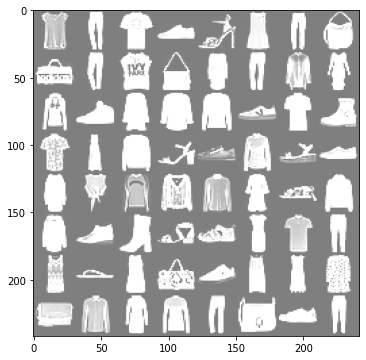

Predict : Shirt  Trouser  T-shirt/top  Sneaker  Sandal  Shirt  Trouser    Bag    Bag  Trouser  T-shirt/top    Bag  Dress  Trouser  Shirt  Dress  Pullover  Sneaker  Dress  Shirt  Pullover  Sneaker  T-shirt/top  Ankle Boot  Shirt  Dress  Pullover  Sandal  Sneaker  Shirt  Sandal  Sneaker  Dress  T-shirt/top  Pullover  Shirt  Shirt   Coat  Sandal   Coat   Coat  Ankle Boot  Ankle Boot  Sandal  Sandal  Dress  T-shirt/top  Trouser  Dress  Sandal  T-shirt/top    Bag  Sneaker  Dress  Dress  Dress    Bag  Shirt  Dress  Pullover  Trouser    Bag  Sneaker  Trouser 


In [21]:
def imshow(img):
    plt.figure(figsize=(8,6))
    img = img / 1 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


dataiter = iter(train_data)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print('Predict :',' '.join('%5s ' % classes[labels[j]] for j in range(b_size)))
